# Notebook to analyse and plot all results

NOTE: you need latex installed to run this notebook
If you dont, uncomment the latex section

In [ ]:
### NAMING CONVENTION FOR RESULTS FILES
# "results type"_"Model Name"_"Model Settings"_train=XX_test=YY.csv
# results type: curves or performance
# model name: GNN, RT, LSTM, FF, GNN-random-steps
# Model settings: can b e anything, but combined with hyphens, NO UNDERSCORES
# train=XX: train task number
# test=YY: test task number

## Example 1: curves_GNN_hid=32-layer=8_train=17_test=11.csv // GNN model with hidden size 32, 8 layers, trained on task 17 and tested on task 11
## Example 2: curves_ADAM_lr=0.001_weightdecay=0.0001_train=17_test=11.csv // ADAM optimizer with learning rate 0.001, weight decay 0.0001, trained on task 17 and tested on task 11
## Example 3: curves_LSTM_hid=32-layer=2_train=17_test=11.csv // LSTM baseline with hidden size 32, 2 layers, trained on task 17 and tested on task 11


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

PATH = "Eval_results-2/" # TODO: change to your path

In [ ]:
def load_results(path):
    results = []

    for file in os.listdir(path):
        print("Loading file:", file)

        if file.endswith(".csv"):
            try: 
                # Try to extract info from filename
                parts = file.split('_')
                print("Parts:", parts)
                results_type = parts[0]
                model = parts[1]
                settings = parts[2]

                train_task = parts[-2]
                test_task = parts[-1].replace(".csv", "")

                print("Extracted info:")
                print("  Results Type:", results_type)
                print("  Model:", model)
                print("  Settings:", settings)
                print("  Train Task:", train_task)
                print("  Test Task:", test_task)
            except Exception as e:
                print("Error extracting info from filename:", e)
                continue


            df = pd.read_csv(os.path.join(path, file))

            df["test_task"] = test_task
            df["train_task"] = train_task
            df["model"] = model
            display(df.head())


            if results_type == "curves":
                ID_VARS = ["train_task", "test_task", "model", "step"]
                df = df.melt(id_vars=ID_VARS, var_name="epoch", value_name="accuracy")
                results.append(df)
    # merge and return
    if results:
        all_results = pd.concat(results, ignore_index=True)
        print("All results loaded successfully.")
        return all_results
    else:
        print("No results found.")
        return pd.DataFrame()



all_results = load_results(PATH)

Loading file: curves_LSTM_hid=32-layer=1_train=17_test=18.csv
Parts: ['curves', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=18.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=18


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,49.996,49.504,50.0,50.000,51.328,test=18,train=17,LSTM
1,20,49.972,49.720,50.0,50.000,51.008,test=18,train=17,LSTM
2,40,49.796,50.188,50.0,49.996,50.724,test=18,train=17,LSTM
3,60,49.620,50.336,50.0,50.000,50.404,test=18,train=17,LSTM
4,80,49.584,50.004,50.0,50.000,50.020,test=18,train=17,LSTM


Loading file: curves_adam_lr0.001-wd0.0001_train=17_test=11.csv
Parts: ['curves', 'adam', 'lr0.001-wd0.0001', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: lr0.001-wd0.0001
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.55,20.00,20.18,20.85,20.04,test=11,train=17,adam
1,20,21.04,21.94,21.85,22.81,21.11,test=11,train=17,adam
2,40,23.33,22.51,25.37,28.89,23.44,test=11,train=17,adam
3,60,24.53,24.43,25.25,27.33,27.76,test=11,train=17,adam
4,80,28.50,27.49,27.38,30.02,29.19,test=11,train=17,adam


Loading file: curves_baseline_hid=64-layer=2_train=17_test=11.csv
Parts: ['curves', 'baseline', 'hid=64-layer=2', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: baseline
  Settings: hid=64-layer=2
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,25.57,26.12,24.92,25.32,23.45,test=11,train=17,baseline
1,20,27.81,29.62,30.58,28.31,28.10,test=11,train=17,baseline
2,40,31.37,33.86,34.14,33.04,32.56,test=11,train=17,baseline
3,60,35.34,34.44,36.79,35.01,35.85,test=11,train=17,baseline
4,80,35.88,37.52,38.02,38.68,36.44,test=11,train=17,baseline


Loading file: performance_LSTM_hid=32-layer=1_train=17_test=18.csv
Parts: ['performance', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=18.csv']
Extracted info:
  Results Type: performance
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=18


,task_id,mean_acc,std_acc,final_accs_per_seed,test_task,train_task,model
0,18,50.0,0.0,"[50.0, 50.0, 50.0, 50.0, 50.0]",test=18,train=17,LSTM


Loading file: curves_GNN-best_PARAMS_train=17_test=11.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.56,22.11,19.99,22.14,19.58,test=11,train=17,GNN-best
1,20,23.05,23.59,23.52,23.94,23.84,test=11,train=17,GNN-best
2,40,27.07,26.33,27.59,28.56,28.05,test=11,train=17,GNN-best
3,60,29.14,28.18,28.81,32.53,30.62,test=11,train=17,GNN-best
4,80,32.47,33.83,31.99,34.99,31.84,test=11,train=17,GNN-best


Loading file: curves_rmsprop_lr0.001-wd0.0_train=17_test=11.csv
Parts: ['curves', 'rmsprop', 'lr0.001-wd0.0', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: rmsprop
  Settings: lr0.001-wd0.0
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,17.39,23.37,22.43,21.31,17.52,test=11,train=17,rmsprop
1,20,22.08,23.38,25.16,20.74,23.64,test=11,train=17,rmsprop
2,40,23.42,26.57,26.83,23.98,21.57,test=11,train=17,rmsprop
3,60,28.27,29.86,28.40,27.61,25.48,test=11,train=17,rmsprop
4,80,28.75,29.00,31.30,25.85,29.11,test=11,train=17,rmsprop


Loading file: curves_GNN-variable-best_PARAMS_train=17_test=11.csv
Parts: ['curves', 'GNN-variable-best', 'PARAMS', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: GNN-variable-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.08,20.49,19.99,22.29,19.17,test=11,train=17,GNN-variable-best
1,20,21.73,23.17,22.81,22.74,22.83,test=11,train=17,GNN-variable-best
2,40,24.79,25.29,27.48,27.97,26.64,test=11,train=17,GNN-variable-best
3,60,26.98,26.82,26.68,31.06,28.80,test=11,train=17,GNN-variable-best
4,80,30.86,31.47,30.86,33.43,29.32,test=11,train=17,GNN-variable-best


Loading file: performance_LSTM_hid=32-layer=1_train=17_test=11.csv
Parts: ['performance', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: performance
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=11


,task_id,mean_acc,std_acc,final_accs_per_seed,test_task,train_task,model
0,11,59.874,0.718376,"[59.06, 59.8, 59.34, 60.03, 61.14]",test=11,train=17,LSTM


Loading file: curves_LSTM_hid=32-layer=1_train=17_test=11.csv
Parts: ['curves', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,19.69,24.63,21.26,23.76,22.05,test=11,train=17,LSTM
1,20,23.96,24.18,25.92,25.56,25.83,test=11,train=17,LSTM
2,40,29.36,30.44,29.11,30.96,30.82,test=11,train=17,LSTM
3,60,32.54,32.13,31.87,34.05,33.50,test=11,train=17,LSTM
4,80,33.91,36.31,35.54,38.03,35.62,test=11,train=17,LSTM


Loading file: performance_baseline_hid=64-layer=2_train=17_test=11.csv
Parts: ['performance', 'baseline', 'hid=64-layer=2', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: performance
  Model: baseline
  Settings: hid=64-layer=2
  Train Task: train=17
  Test Task: test=11


,task_id,mean_acc,std_acc,final_accs_per_seed,test_task,train_task,model
0,11,42.852,0.89843,"[43.11, 42.77, 42.94, 41.32, 44.12]",test=11,train=17,baseline


Loading file: curves_RT-gnn_rt-hid_32-layers_2_train=17_test=11.csv
Parts: ['curves', 'RT-gnn', 'rt-hid', '32-layers', '2', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: rt-hid
  Train Task: train=17
  Test Task: test=11


,step,seed_0,test_task,train_task,model
0,0,24.22,test=11,train=17,RT-gnn
1,20,27.26,test=11,train=17,RT-gnn
2,40,30.61,test=11,train=17,RT-gnn
3,60,33.58,test=11,train=17,RT-gnn
4,80,35.05,test=11,train=17,RT-gnn


Loading file: curves_RecurrentGNN_layer=8-hid=64_train=17_test=11.csv
Parts: ['curves', 'RecurrentGNN', 'layer=8-hid=64', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: RecurrentGNN
  Settings: layer=8-hid=64
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,23.61,25.04,25.72,27.81,24.96,test=11,train=17,RecurrentGNN
1,20,28.81,31.56,32.26,32.26,29.42,test=11,train=17,RecurrentGNN
2,40,31.18,34.29,36.10,33.56,33.83,test=11,train=17,RecurrentGNN
3,60,35.67,35.37,39.46,35.09,35.77,test=11,train=17,RecurrentGNN
4,80,34.58,37.41,39.45,35.95,35.60,test=11,train=17,RecurrentGNN


All results loaded successfully.


In [20]:
# rename for plottings

# extract model names as dictionary
model_names = all_results["model"].unique()
model_names_dict = {name: name for name in model_names}

to_rename = {"GNN-best": "GNN",
 "GNN-variable-best": "GNN-variable",
 "RT-gnn": "RT",
 "baseline": "MLP",
 "adam": "ADAM",
 "rmsprop": "RMSprop",}

all_results["model"] = all_results["model"].replace(to_rename)


In [21]:
all_results
available_models = all_results["model"].unique()
print("Available models:", available_models)

Available models: ['LSTM' 'ADAM' 'MLP' 'GNN' 'RMSprop' 'GNN-variable' 'RT' 'RecurrentGNN']


## Latex PLOTTING

Uncomment this if you dont have latex installed

In [15]:

rcParams['figure.figsize'] = 12, 4

# Use LaTeX font for publication
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm10"],
    "font.size": 12,
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm}')
percent_formatter = plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))

# # Global settings for LaTeX-like fonts
plt.rcParams['text.usetex'] = True  # Disable full LaTeX rendering to avoid dependency issues
plt.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern (LaTeX-like) fonts
plt.rcParams['font.family'] = 'serif'  # Set overall font to serif (LaTeX-style)

# Set the color for axes edges (spines)
plt.rcParams['axes.edgecolor'] = 'darkgray'
# Enable the grid for the y-axis only
plt.rcParams['axes.grid'] = True  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Optional: Set grid line style
plt.rcParams['grid.color'] = 'lightgray'  # Optional: Set grid line color

# # Disable LaTeX rendering to avoid dependency issues
# # plt.rcParams['text.usetex'] = False
# # Use 'DejaVu Serif' or another font that's available on your system
# # plt.rcParams['font.family'] = 'serif'
# # plt.rcParams['font.family'] = 'cmr10'
# # plt.rcParams['font.family'] = 'cmss10'
# # plt.rcParams['formatter.use_mathtext'] = True

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Plots

In [16]:
# plit settings
trained_on = 17
tested_in  = 11



def simple_lineplot(trained_on, tested_in, included_models):
    filtered_results = all_results[
        (all_results["train_task"] == f"train={trained_on}") &
        (all_results["test_task"] == f"test={tested_in}") &
        (all_results["model"].isin(included_models))
    ]
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=filtered_results, x="step", y="accuracy", hue="model", markers=True, dashes=False)
    plt.xlabel("Training Steps")
    plt.ylabel("Accuracy (\%)")
    # save it
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"lineplot_train={trained_on}_test={tested_in}_models={','.join(included_models)}.pdf", dpi=300, bbox_inches='tight')
    # plt.title(f"Training on Task {trained_on} and Testing on Task {tested_in}")



### Section Replication

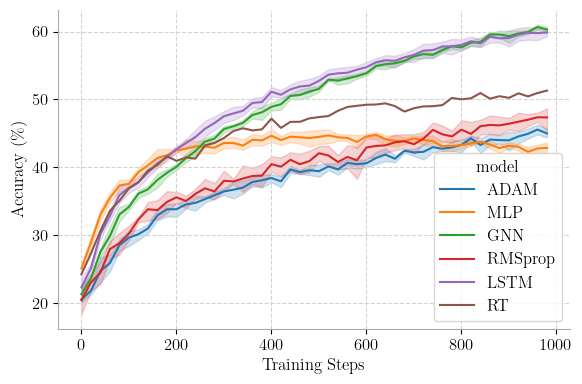

In [23]:
included_models = ['ADAM', 'RMSprop', 'RT', 'GNN', "LSTM", "MLP"]
simple_lineplot(trained_on, 11, included_models)

### Section Improvement

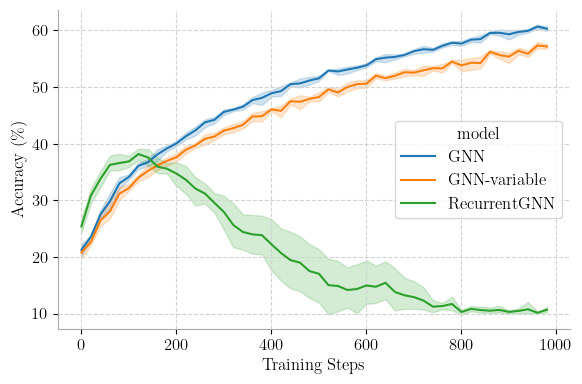

In [24]:
included_models = ["GNN-variable", "GNN", "RecurrentGNN"]
simple_lineplot(trained_on, 11, included_models)

### Section Generalization Experiments

##### CNN

TODO: make some plots of model complexity (depth, width of layers) vs. final performance for CNN tasks

##### Transformer Task

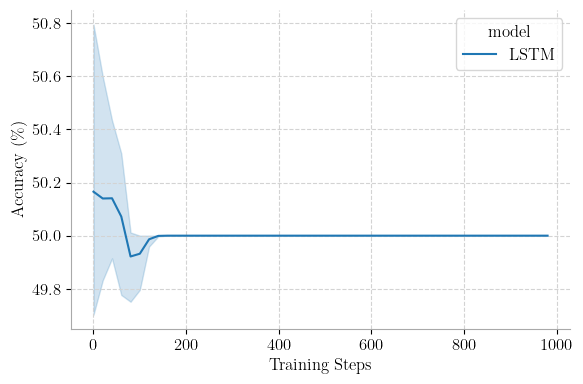

In [ ]:
included_models = ['"TODO""]
simple_lineplot(trained_on, 18, included_models)